project name: flexpart_management
created by diego aliaga daliaga_at_chacaltaya.edu.bo

imports

In [2]:

from useful_scit.imps import *
# noinspection PyUnresolvedReferences
import matplotlib.colors
import flexpart_management.modules.FlexLogPol as FlexLogPol
import flexpart_management.modules.constants as co
# noinspection PyUnresolvedReferences
import flexpart_management.modules.flx_array as fa


# def main() :
plt.rcParams[ 'figure.facecolor' ] = 'white'

# code

In [3]:
def plot_hist_cum_cells(
        flp_instance , cumulative=False ,
        density=False , y_min=10. , y_scale='log' ) :
    # todo: you stopped here on friday.
    # next steps:
    # - plot for releases too
    # - decide where to cluster
    min_log = 1
    max_log = 1e7
    log_bin = np.geomspace( min_log , max_log , 20 )
    log_bin = [ 0 , *log_bin ]
    f , ax = plt.subplots()
    ax: plt.Axes
    conc__sum = flp_instance.merged_ds[ co.CONC ].sum( [ co.RL ] )
    conc__sum.plot.hist( bins=log_bin ,
                         ax=ax ,
                         alpha=.5 ,
                         cumulative=cumulative ,
                         density=density
                         )
    ax.set_xscale( 'log' )
    ax.set_yscale( y_scale )
    ax.set_xlim( min_log / 2 , max_log )
    ax.set_ylim( y_min , None )
    ax.set_ylabel( 'number of cells' )
    hist_type = 'cumulative' if cumulative else 'histogram'
    unit = '[unit]' if density else ''
    ax.set_title(
        f'{hist_type} of particle counts per cell {unit}' )
    ax.set_xlabel( 'concentration in cell' )

def plot_cum_cell_count_vs_cum_cell_conc( flp_instance ) :
    ds = flp_instance.merged_ds
    ds1 = ds.reset_coords( drop=True )[ co.CONC ]
    ds2 = ds1.sum( co.RL )
    df = ds2.to_dataframe()
    # %%
    df1: pd.DataFrame = df.reset_index( drop=True )
    # %%
    tot_con_per = ds2.sum().item() / 100
    tot_cells_per = ds2.count().item() / 100
    df_ordered = df1.sort_values( co.CONC , ascending=True )
    df2 = df_ordered.reset_index( drop=True ).reset_index()
    con_per = 'con_per'
    con_index = 'con_index'
    con_per_cum = 'con_per_cum'
    index = 'index'
    df2[ con_per ] = df2[ co.CONC ] / tot_con_per
    df2[ con_index ] = df2[ index ] / tot_cells_per + 1.
    df2[ con_per_cum ] = df2[ con_per ].cumsum()
    df2: pd.DataFrame
    # %%
    f , ax = plt.subplots()
    ax: plt.Axes
    df2.plot.scatter( x=con_index , y=con_per_cum , ax=ax )
    # ax.set_xscale('log')
    ax.set_ylim( 1 , 100 )
    ax.set_xlim( 80 , 101 )
    # ax.set_yscale('log')
    ax.set_xlabel( 'cumulative cell count [%]' )
    ax.set_ylabel( 'cumulative concentration in cell [%]' )

def plot_radial_distance_vs_conc( selfFLP ) :
    ds = selfFLP.merged_ds
    # %%
    ds1 = ds[ co.CONC ].sum( [ co.RL , co.TH_CENTER , co.ZM ] )
    ds1
    # %%
    f , ax = plt.subplots()
    f: plt.Figure
    ax: plt.Axes
    ds1.plot( linewidth=0 , marker='.' , ax=ax )
    ax.set_xlabel( '''radial distance from chc [100km]

    * there seems to be a problem at the juncture between low and high res
    ''' )
    ax.set_ylabel( 'concetration grouped by radial distance' )
    ax.set_xscale( 'log' )
    v_line = .07
    ax.axvline( x=v_line , color='k' )
    v_text = f'{v_line}={v_line * 100:4.1f}[km]'
    ax.annotate( v_text , xy=(v_line , 1.) ,
                 xycoords=('data' , 'axes fraction') )
    v_line = 2e1
    ax.axvline( x=v_line , color='k' )
    v_text = f'{v_line}={v_line * 100:4.1f}[km]'
    ax.annotate( v_text , xy=(v_line , 1.) ,
                 xycoords=('data' , 'axes fraction') )

In [4]:
# noinspection SpellCheckingInspection
path = \
    '/homeappl/home/aliagadi/wrk/DONOTREMOVE/flexpart_management_data' \
    '/runs/' + \
    'run_2019-10-02_13-42-52_/log_pol/run_2019-10-02_13-42-52_'
# flp = FLP.FlexLogPol(path,concat=True)
# flp_instance = FLP.FlexLogPol(path,concat=False)
selfFLP = FlexLogPol.FlexLogPol(
    path ,
    # concat=True,
    concat=False ,
    get_clusters=False ,
    #     open_merged=False,
    open_merged=True ,
    # merge_ds=False ,
    merge_ds=True ,
    clusters_avail=False ,
    postprocess=True ,
    use_new_merge_fun=True
    )

'using vol for conc'
starting


# plots

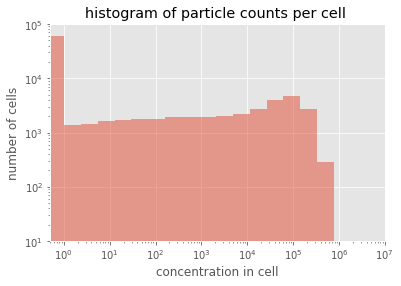

In [5]:

plot_hist_cum_cells( selfFLP )
plt.show()

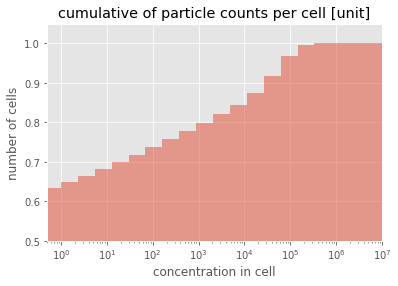

In [6]:
plot_hist_cum_cells( selfFLP ,
                     cumulative=True ,
                     density=True ,
                     y_min=.5 ,
                     y_scale='linear'
                     )
plt.show()

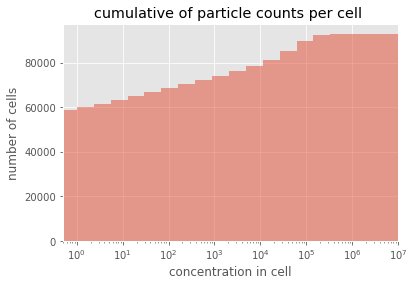

In [7]:

# noinspection PyTypeChecker
plot_hist_cum_cells( selfFLP ,
                     cumulative=True ,
                     density=False ,
                     y_min=None ,
                     y_scale='linear'
                     )
plt.show()

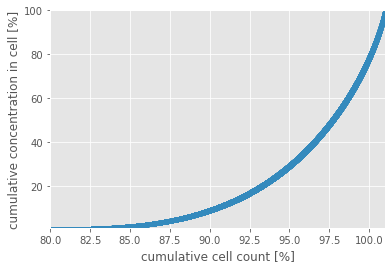

In [8]:
plot_cum_cell_count_vs_cum_cell_conc( selfFLP )
plt.show()

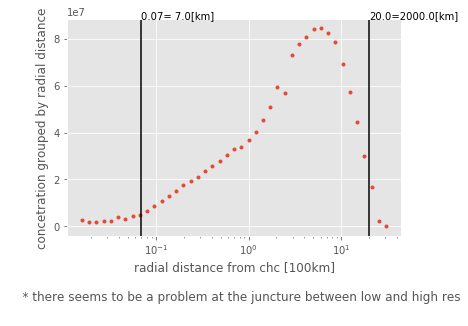

In [10]:

plot_radial_distance_vs_conc( selfFLP )
plt.show()

In [ ]:
# main()